# Library

In [1]:
%matplotlib inline
import numpy as np
import cv2
import skimage.data as data
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
import skimage.segmentation as seg
import matplotlib.pyplot as plt
import pydicom

# Function

In [2]:
def ShowImage(title,img,ctype):
  plt.figure(figsize=(9, 9))
  if ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

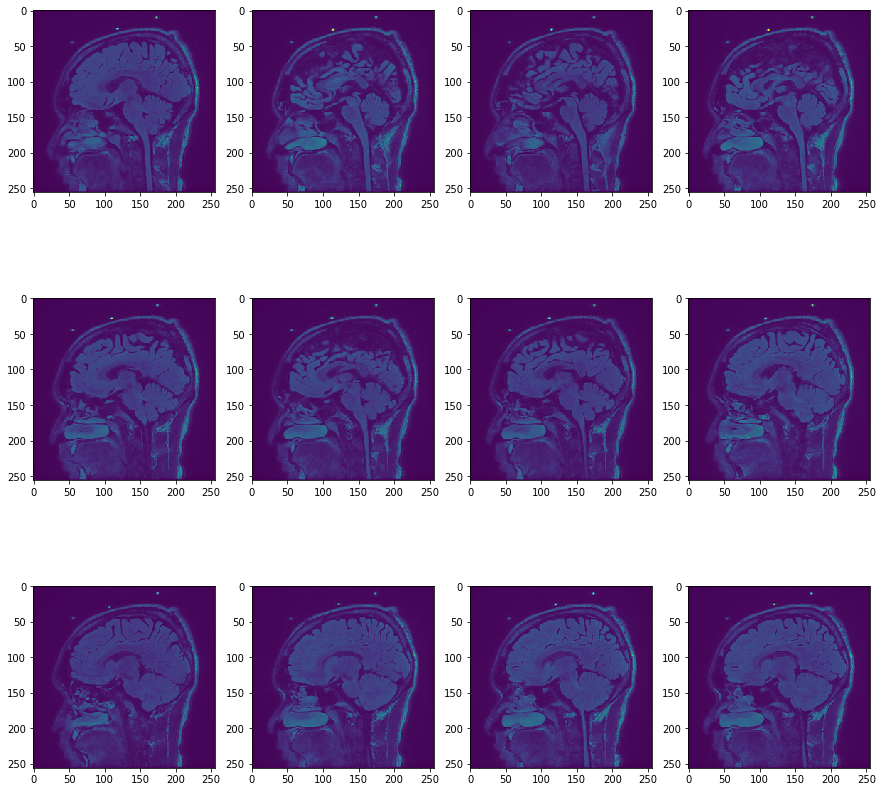

In [3]:
basepath ="C:\\Users\\Asus\\Desktop\\tugas\\RPLB (python)\\dicom\\"
list = ['Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z114', 'Z115'] 
list_a = []

for f in list:
    d = pydicom.read_file(basepath+f)
    a = np.array(d.pixel_array)
    list_a.append(a)
    
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(list_a[i])

    

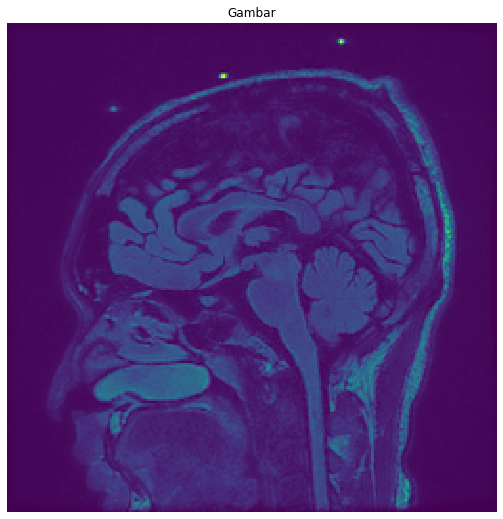

In [27]:
basepath ="C:\\Users\\Asus\\Desktop\\tugas\\RPLB (python)\\dicom\\"
d = pydicom.read_file(basepath + "Z106")
file = np.array(d.pixel_array)
img = file
ShowImage('Gambar',img,'rgb')

In [28]:
img_2d = img.astype(float)
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)
hasil = img_2d_scaled

# Otsu Thresholding

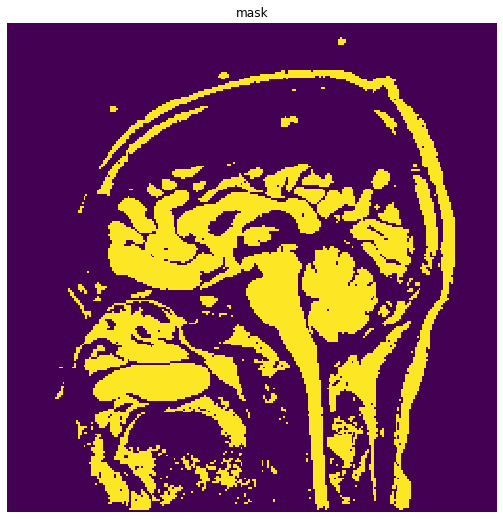

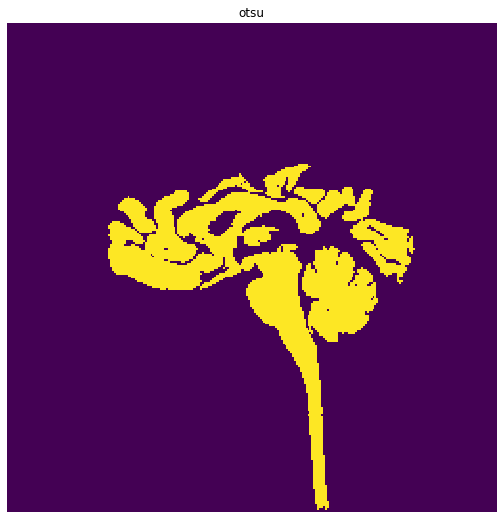

In [29]:
#OTSU THRESHOLDING
_,binarized = cv2.threshold(hasil, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

foreground_value = 255
mask_binarized = np.uint8(binarized == foreground_value)
ShowImage('mask',mask_binarized,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_binarized, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
otsu = np.zeros_like(binarized)
otsu[labels == largest_label] = foreground_value
ShowImage('otsu',otsu,'rgb')

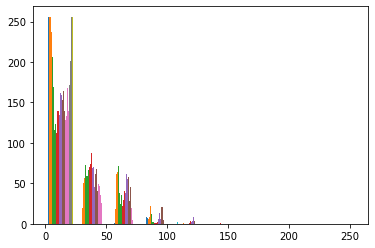

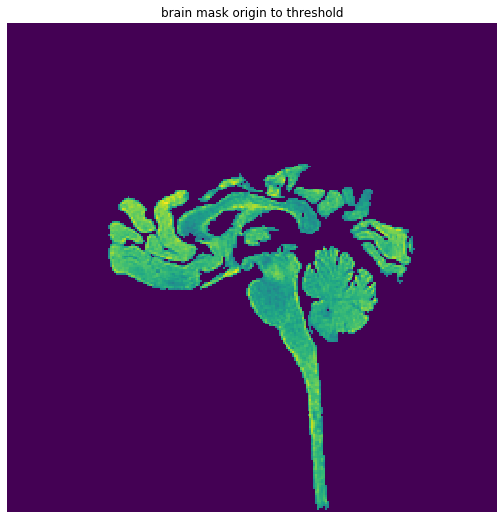

In [31]:
plt.hist(hasil)

thresh = binarized
gambar1 = hasil
#Get brain
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0]

#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        

#Get pixels which correspond to the brain
brain_mask = markers==largest_component
otak = gambar1.copy()

#In a copy of the original image, clear those pixels that don't correspond to the brain
# otak[brain_mask==False]=(0,0,0)
otak[brain_mask==False] = 0
ShowImage('brain mask origin to threshold',otak,'rgb')

# invers otsu

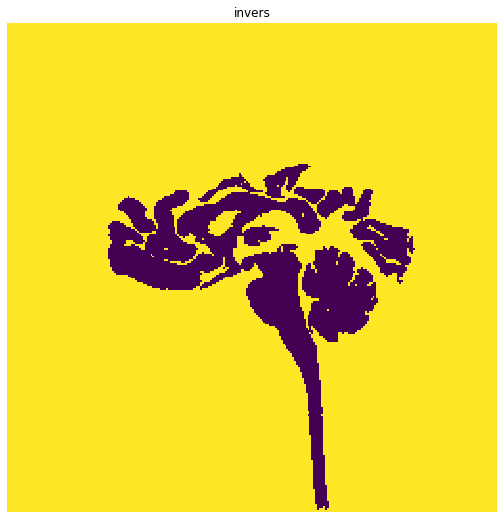

In [30]:
invers = cv2.bitwise_not(otsu)
ShowImage('invers',invers,'rgb')

# Erosion from otsu

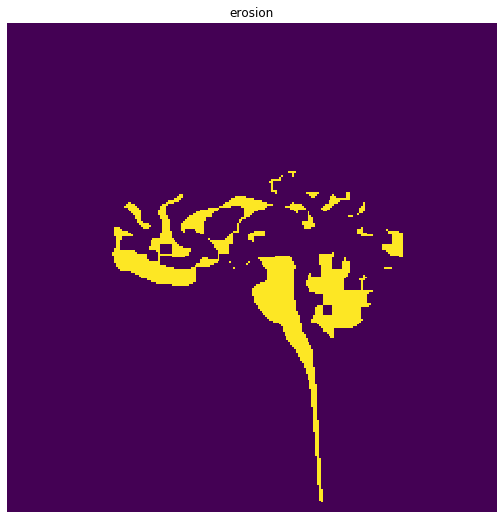

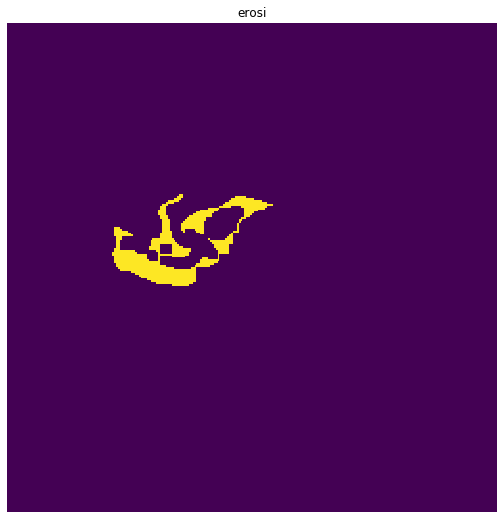

In [34]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(otsu,kernel,iterations = 1)
ShowImage('erosion',erosion,'rgb')

foreground_value = 255
mask_erosion = np.uint8(erosion == foreground_value)
# ShowImage('mask',mask_erosion,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_erosion, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
erosi = np.zeros_like(erosion)
erosi[labels == largest_label] = foreground_value
ShowImage('erosi',erosi,'rgb')

# Opening from erosion

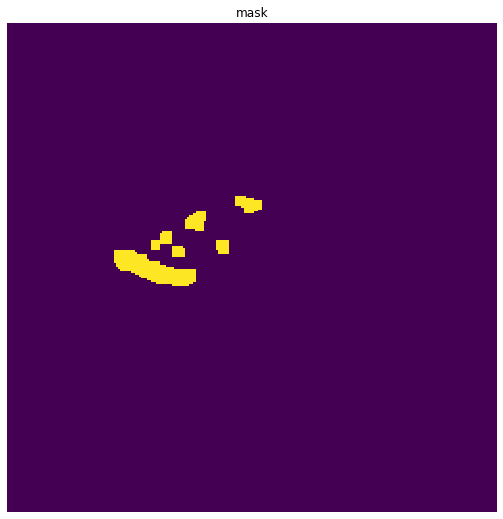

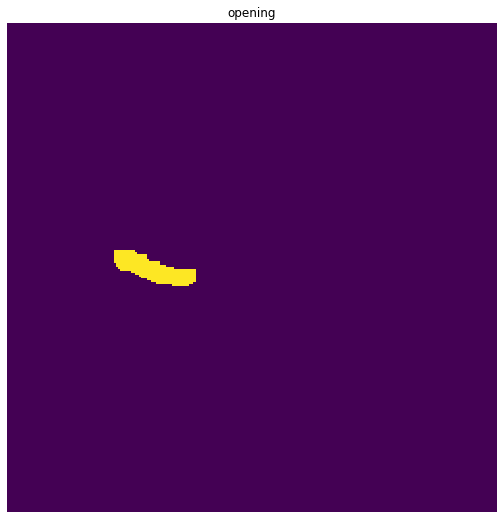

In [36]:
bentuk = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(erosi, cv2.MORPH_OPEN, bentuk)
# ShowImage('opening',opening,'rgb')

foreground_value = 255
mask_opening = np.uint8(opening == foreground_value)
ShowImage('mask',mask_opening,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_opening, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
buka = np.zeros_like(opening)
buka[labels == largest_label] = foreground_value
ShowImage('opening',buka,'rgb')

# Closing from erosion

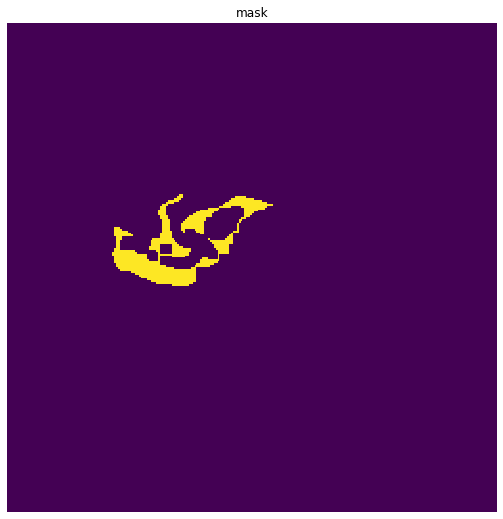

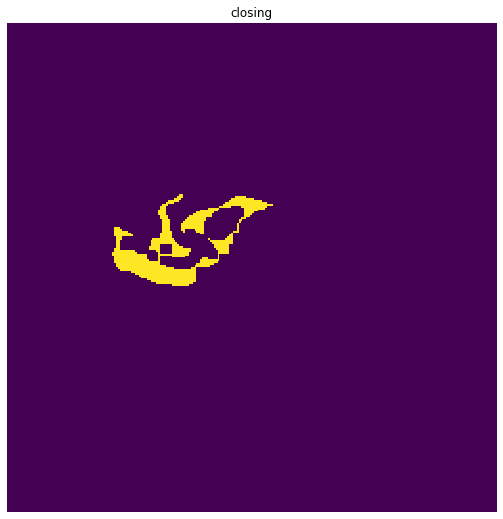

In [37]:
kernel = np.ones((5, 5), np.uint8)
closing = cv2.morphologyEx(erosi, cv2.MORPH_CLOSE, kernel)
# ShowImage('closing',closing,'rgb')

foreground_value = 255
mask_closing = np.uint8(closing >= foreground_value)
ShowImage('mask',mask_closing,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_closing, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
close = np.zeros_like(closing)
close[labels == largest_label] = foreground_value
ShowImage('closing',close,'rgb')


# closing from invers

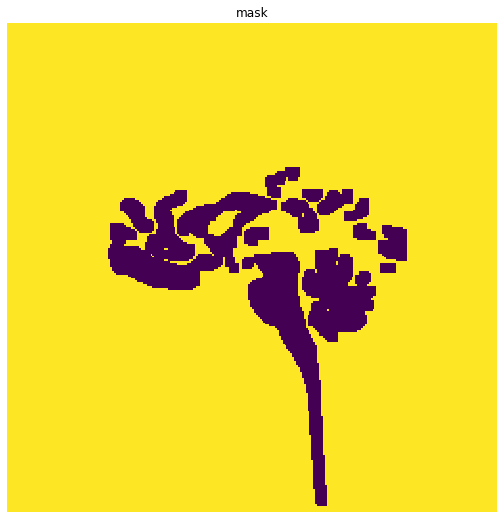

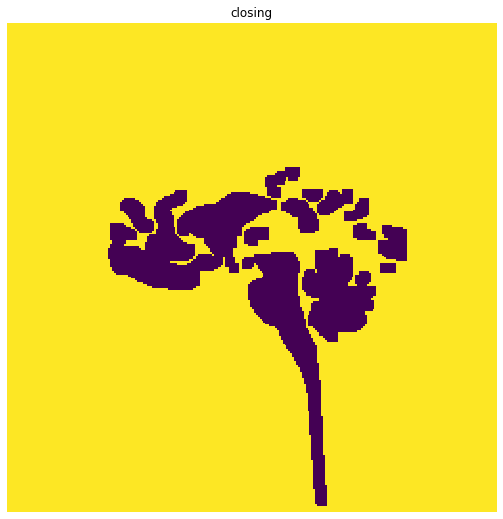

In [38]:
kernel = np.ones((5, 5), np.uint8)
closing_invers = cv2.morphologyEx(invers, cv2.MORPH_CLOSE, kernel)
# ShowImage('closing invers',closing_invers,'rgb')

foreground_value = 255
mask_closing = np.uint8(closing_invers >= foreground_value)
ShowImage('mask',mask_closing,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_closing, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
close_invers = np.zeros_like(closing_invers)
close_invers[labels == largest_label] = foreground_value
ShowImage('closing',close_invers,'rgb')


# Dilation from opening

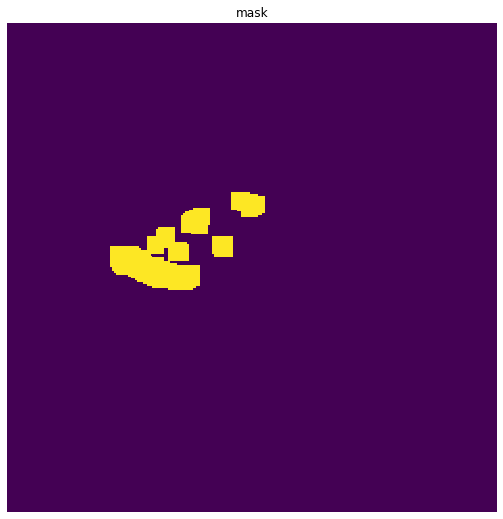

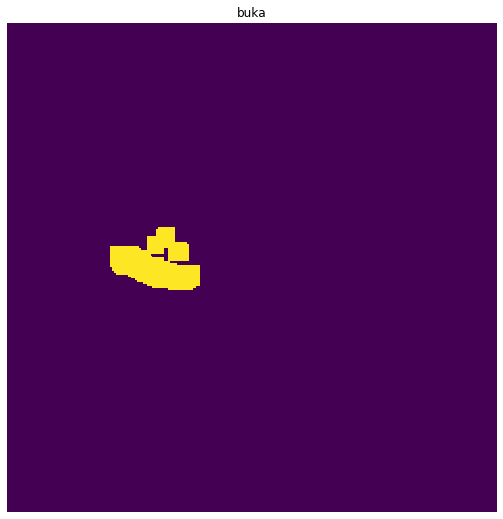

In [41]:
shape = np.ones((5, 5), np.uint8)
dilation_open = cv2.dilate(opening,shape,iterations = 1)
# ShowImage('dilation open',dilation_open,'rgb')

foreground_value = 255
mask_dilation = np.uint8(dilation_open == foreground_value)
ShowImage('mask',mask_dilation,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_dilation, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
buka_dilasi = np.zeros_like(opening)
buka_dilasi[labels == largest_label] = foreground_value
ShowImage('buka',buka_dilasi,'rgb')

# Dilation from closing

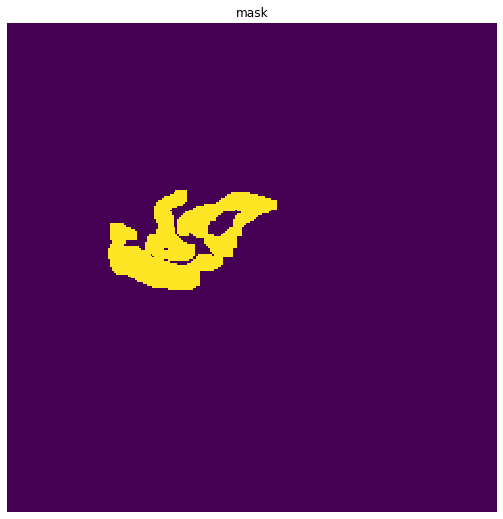

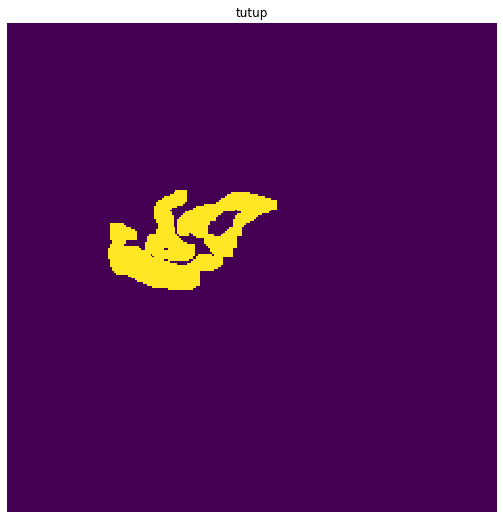

In [42]:
bentukan = np.ones((5, 5), np.uint8)
dilasi_close = cv2.dilate(closing,bentukan,iterations = 1)
# ShowImage('dilasi close',dilasi_close,'rgb')

foreground_value = 255
mask_dilasi = np.uint8(dilasi_close == foreground_value)
ShowImage('mask',mask_dilasi,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_dilasi, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
tutup_dilasi = np.zeros_like(dilasi_close)
tutup_dilasi[labels == largest_label] = foreground_value
ShowImage('tutup',tutup_dilasi,'rgb')


# dilation from closing_invers

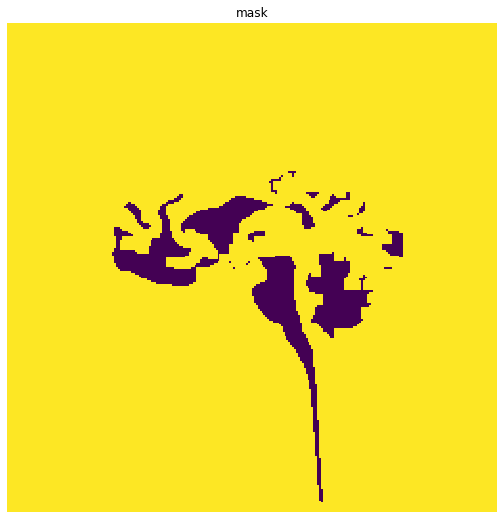

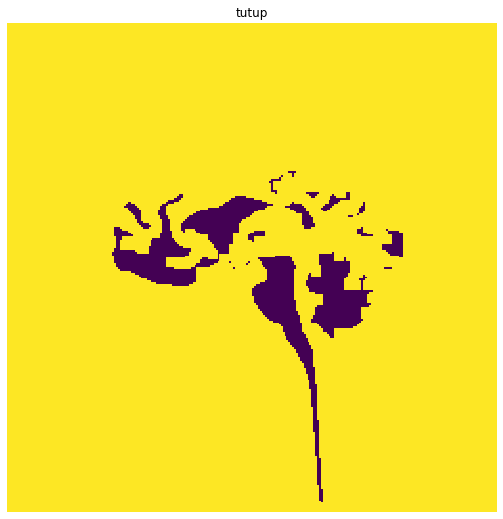

In [43]:
bentukan = np.ones((5, 5), np.uint8)
dilasi = cv2.dilate(close_invers,bentukan,iterations = 1)

foreground_value = 255
mask_dilasi = np.uint8(dilasi >= foreground_value)
ShowImage('mask',mask_dilasi,'rgb')

labels, stats = cv2.connectedComponentsWithStats(mask_dilasi, 4)[1:3]
largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
tutup_invers = np.zeros_like(dilasi)
tutup_invers[labels == largest_label] = foreground_value
ShowImage('tutup',tutup_invers,'rgb')


# Skull Stripping

In [44]:
img_2d = file.astype(float)
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)
hasil = img_2d_scaled

#Skull Stripping
skull_stripped_image = cv2.bitwise_and(
    hasil, hasil, mask = tutup_dilasi)
brain_pixels = skull_stripped_image[tutup_dilasi == foreground_value]
print (brain_pixels, 'Brain Pixels')

# Adapting the data to K-means
kmeans_input = np.float32(brain_pixels.reshape(
    brain_pixels.shape[0], brain_pixels.ndim))
print(kmeans_input, 'Kmeans Input')

# K-means parameters
epsilon = 0.01
number_of_iterations = 50
number_of_clusters = 4
number_of_repetition = 10
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            number_of_iterations, epsilon)
flags = cv2.KMEANS_RANDOM_CENTERS
print(criteria, 'criteria Paramaters')

# K-means segmentation
_, labels, centers = cv2.kmeans(
    kmeans_input, number_of_clusters, None, criteria,
    number_of_repetition, flags)
print(labels.shape, 'K-means segmentation')

# Adapting the labels
labels = labels.flatten('F')
for x in range(number_of_clusters):
    labels[labels == x] = centers[x]

[37 59 67 ... 46 51 37] Brain Pixels
[[37.]
 [59.]
 [67.]
 ...
 [46.]
 [51.]
 [37.]] Kmeans Input
(3, 50, 0.01) criteria Paramaters
(2273, 1) K-means segmentation


# Segmented Image

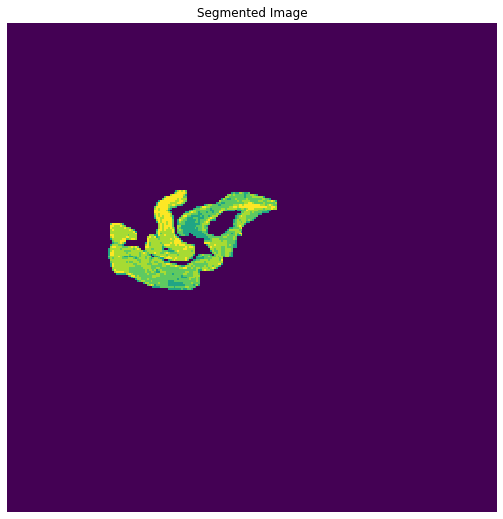

In [45]:
segmented_image = np.zeros_like(tutup_dilasi)
segmented_image[tutup_dilasi == foreground_value] = labels
ShowImage('Segmented Image',segmented_image,'rgb')

In [46]:
def circle_points(resolution, center, radius):
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)#polar co-ordinates
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T
# Exclude last point because a closed path should not have duplicate points
points = circle_points(200, [100, 130], 40)[:-1]

def image_show(image, nrows=1, ncols=1, cmap='gray'): 
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 9)) 
    ax.imshow(image, cmap='gray') 
    ax.axis('off') 
    return fig, ax 

In [ ]:
# fig, ax = ShowImage('segmen',segmented_image,'rgb')
fig, ax = image_show(segmented_image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)

In [ ]:
import skimage.color as color 
image_gray = color.rgb2gray(segmented_image) 
image_show(image_gray);

In [ ]:
snake = seg.active_contour(image_gray, points,alpha=0.06,beta=0.3)
fig, ax = image_show(segmented_image)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3);

In [ ]:
ShowImage('Segmented Image',segmented_image,'rgb')

In [ ]:
from skimage.segmentation import random_walker
from skimage.exposure import rescale_intensity
import skimage

# plt.imsave('percobaan.jpg',image_gray)
from skimage import io
image = io.imread('percobaan.jpg') 
image_gray = color.rgb2gray(image)
data = image_gray
plt.hist(data)
ShowImage('Segmented Image',data,'rgb')

# data = skimage.img_as_float(data(length=128, seed=1))
sigma = 0.35
data += np.random.normal(loc=0, scale=sigma, size=data.shape)
data = rescale_intensity(data, in_range=(-sigma, 1 + sigma),
                         out_range=(-1, 1))
# print(data)

# The range of the binary image spans over (-1, 1).
# We choose the hottest and the coldest pixels as markers.
markers = np.zeros(data.shape, dtype=np.uint)
markers[data < -0.95] = 1
markers[data > 200] = 2

# Run random walker algorithm
labels = random_walker(data, markers, beta=10, mode='bf')
# invers = cv2.bitwise_not(labels)
# Plot results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 3.2),
                                    sharex=True, sharey=True)
ax1.imshow(data, cmap='gray')
ax1.axis('off')
ax1.set_title('Noisy data')
ax2.imshow(markers, cmap='magma')
ax2.axis('off')
ax2.set_title('Markers')
ax3.imshow(markers, cmap='gray')
ax3.axis('off')
ax3.set_title('Segmentation')

fig.tight_layout()
plt.show()